<a href="https://colab.research.google.com/github/ncfausti/Data-Science/blob/master/Copy_of_oct_3_vgg_loss_tensorflow_2_12_trainCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To use a model (*.h5) already created and saved to colab go here:

loadModel.ipynb https://colab.research.google.com/drive/1aXIbdQztc77bY7CdazEd59oJijxDXHQM

### Model naming format:  
`Overview-Ind-Study/Overview/<loss function>-<batch size>-<epochs>-<learning rate>.h5`

### Results naming format:
`Overview-Ind-Study/Overview/newModel/<loss function>-<batch size>-<epochs>-<learning rate>.jpg`


### Import proper version of TF - 2.12

In [1]:
# when restarting or reopening this notebook, you must
# uncomment the line below, run this cell, restart the notebook, then comment out
# the line below again

# !pip install --upgrade tensorflow-gpu
# !pip install --upgrade tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


Define the new VGG loss function. Block5 returns higher level, lower block number returns more low-level features.

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
import sys
sys.path.append('/content/drive/MyDrive/Overview-Ind-Study/Overview/modules')

# Define the VGG19 model
vgg = VGG19(include_top=False, weights='imagenet')
vgg.trainable = False

# Select the layer to get features from
feature_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block5_conv4').output)

# Define the perceptual loss
def vgg_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(feature_extractor(y_true) - feature_extractor(y_pred)))
print(vgg)

80134624/80134624 [==============================] - 5s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')
MY_DRIVE = '/content/drive/MyDrive'
%cd MY_DRIVE

X_TRAIN_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/x_train/"
Y_TRAIN_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/y_train/"

# find the number of filenames that are in both, use this value as first
# dimension of training/test tensors, i.e. number of training instances
CMD_RESULT = !find $X_TRAIN_PATH $Y_TRAIN_PATH -printf '%P\n' | sort | uniq -d | wc -l
NUM_TRAINING_INSTANCES = int(CMD_RESULT[0])

print(X_TRAIN_PATH)
print(Y_TRAIN_PATH)
print(NUM_TRAINING_INSTANCES)
# assert NUM_TRAINING_INSTANCES > 500

Mounted at /content/drive
[Errno 2] No such file or directory: 'MY_DRIVE'
/content
/content/drive/MyDrive/Overview-Ind-Study/Overview/data/x_train/
/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/
2420


Check filesystem loaded correctly

In [4]:
!ls '/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/953.jpg'

/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/953.jpg


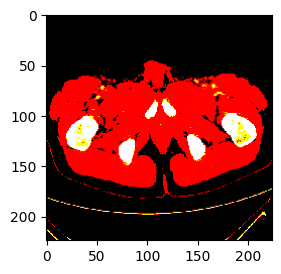

In [5]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

# Load an image file
img = load_img('/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/953.jpg', target_size=(224, 224))

# Convert the image to an array
img_array = img_to_array(img)

# Expand dimensions so the image has a batch size
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image to make it suitable for VGG19
img_array = preprocess_input(img_array)

plt.subplot(121)
plt.imshow(img_array[0], cmap='gray')
# import imageio
# image = imageio.imread('/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/953.jpg')
# image = image / 255.0
plt.subplot(121)
plt.imshow(img_array[0], cmap="gray")

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, Conv2D)

import numpy as np
import os
from PIL import Image
import os.path
from os import path
import tensorflow as tf
from google.colab.patches import cv2_imshow
from time import time
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Convolution2D, Input
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Concatenate
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
# from tensorflow.keras.layers.convolutional import Convolution2D
import six
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2DTranspose,
    Activation,
    UpSampling2D,
    MaxPooling2D,
    Dense,
    Flatten
)

from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from datetime import datetime

In [7]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load an image file
# img = load_img('image.jpg', target_size=(224, 224))

# # Convert the image to an array
# img_array = img_to_array(img)

# # Expand dimensions so the image has a batch size
# img_array = np.expand_dims(img_array, axis=0)

# # Preprocess the image to make it suitable for VGG19
# img_array = preprocess_input(img_array)

# # ==================================================================

def extract_data_testing(xPath, yPath):
  X, y = np.zeros((12,512,512,3)), np.zeros((12,512,512,3))

  index = 0
  for file in os.listdir(xPath):
    if path.exists(xPath + file):
        print('path exists: ')
        img = Image.open(xPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        X[index] = imgArray

        img = Image.open(yPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        y[index] = imgArray

        index += 1
  return X, y

# Comment out the last line in the next cell to create a new model

In [9]:

# My baseline, after using all images and keeping other hyperparameters the same
# loaded_model = load_model(f"{MY_DRIVE}/Overview-Ind-Study/Overview/trained-on-all-images-mar-25-2022.h5")

loaded_model = None
# Best so far
# loaded_model = load_model(f"{MY_DRIVE}/Overview-Ind-Study/Overview/mse-8-15-0.0005.h5")

In [10]:
X_TEST_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/x_test/"
Y_TEST_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/y_test/"
test_labels_dataset = tf.keras.preprocessing.image_dataset_from_directory(Y_TEST_PATH, label_mode=None, image_size=(512, 512), shuffle=False)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(X_TEST_PATH, label_mode = None, image_size=(512, 512), shuffle=False)

# zip x_train, y_train (input image and desired output image) into a tuple of datasets
# this will be the input
zipped_test_dataset = tf.data.Dataset.zip((test_dataset, test_labels_dataset))

if loaded_model:
    # X_test, y_test = extract_data_testing(X_TEST_PATH, Y_TEST_PATH)

    print('predicting...')
    # score = loaded_model.predict(test_dataset)
    # make prediction  n
    out_array = loaded_model.predict(test_dataset)
    out_array = out_array.astype(np.float32) * 255.
    out_array = np.clip(out_array, 0, 255).astype('uint8')

    num, rows, cols, channels = out_array.shape
    print(out_array.shape)
    for n in range(num):
        filename = str(n) + ".jpg"
        # save prediction
        out_img = Image.fromarray(out_array[n]).convert('L') # convert to black and white
        out_img.save(f"{MY_DRIVE}/Overview-Ind-Study/Overview/out_" + str(time()) + filename, format="JPEG")

        print(out_img)



    loaded_model.evaluate()


Found 12 files belonging to 1 classes.
Found 12 files belonging to 1 classes.


In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

### New Data Loading (23 May 2022)

In [12]:
# The generator that you are passing to the fit sequence must generate a tuple (img1, img2). You can use tf.data.Dataset.zip to achieve the desired shape :

# normalize
def process(image):
    img = tf.cast(image ,tf.float32)
    # imgArray = np.asarray(img, dtype='uint8')
    imgArray =  img / 255.0
    return imgArray


labels_dataset = tf.keras.preprocessing.image_dataset_from_directory(Y_TRAIN_PATH, label_mode=None, image_size=(512, 512), shuffle=False)
labels_dataset = labels_dataset.map(process)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(X_TRAIN_PATH, label_mode = None, image_size=(512, 512), shuffle=False)
train_dataset = train_dataset.map(process)

# zip x_train, y_train (input image and desired output image) into a tuple of datasets
zipped_train_dataset = tf.data.Dataset.zip((train_dataset, labels_dataset))

Found 2419 files belonging to 1 classes.
Found 2419 files belonging to 1 classes.


In [ ]:
# plt.figure(figsize=(10, 10))
# class_names = labels_dataset.class_names


# for images, labels in zipped_train_dataset.take(1):
#     for i in range(3):
#         # ax = plt.subplot(6, 6, i + 1)
#         img = images[i].numpy().astype("float")
#         print(img)
#         # plt.imshow(img)
#         # plt.title(class_names[labels[i]])|
#         # plt.axis("off")
# plt.figure(figsize=(10, 10))
# for images, labels in zipped_train_dataset.take(1):
#     for i in range(3):
#         # ax = plt.subplot(6, 6, i + 1)
#         img = labels[i].numpy().astype("float")
#         print(img)
#         # plt.imshow(img)
#         # plt.axis("off")

In [ ]:
# What am I doing each time?
# shuffling between combinations of (loss_fn={"mse"|""|""},
# batch_size={8|16|32}, epochs={1|3|5|10|15|20|25|50|100} )
# These are the values to perform a search on

# LOSS_FN = vgg_loss

# 8 16 32
# BATCH_SIZE = 16

# 10, 20, 50, 100, 200, 500, 1000
# EPOCHS = 10

# 0.0001 0.0003 .0005
# 0003 vs 00025 vs 00035
# LEARNING_RATE = 0.0003


#experiments:
# A [loss=mse, batch=8, epochs=10] lr= 0.0001 vs lr = 0.0003
# take best, use in next comparison, i.e. a tree of best settings until
# finally getting all the optimal settings
# Winner of A vs .0005
# B [loss=mse, batch=8, epochs=10] lr=<winner of A> vs lr = 0.0005
# Winner of A & B vs .001
#experiments: [loss=mse, batch=8, epochs=10] lr= 0.0003 vs lr = 0.0005
# compare agianst marissa's results, my baseline results with new data loading


LOSS_FN = vgg_loss

# 8 16 32
BATCH_SIZE = 16

# 10, 20, 50, 100, 200, 500, 1000
EPOCHS = 100

# 0.0001 0.0003 .0005
# 0003 vs 00025 vs 00035
LEARNING_RATE = 0.0003
ROW_AXIS = 1
COL_AXIS = 2
CHANNEL_AXIS = 3

def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    # 1 X 1 conv if shape is different. Else identity.
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

    return Concatenate()([shortcut, residual])


def generate_model():
  filters = [64, 128, 256, 512, 1024]
  poolsize = 2 # (2,2)
  kernelsize = 3 # (3,3)
  x = Input(shape=(512,512,3))
  a = Convolution2D(filters[0], kernelsize, activation="relu", padding="same")(x)
  b = MaxPooling2D(pool_size=poolsize, strides=2)(a)
  c = Convolution2D(filters[1], kernelsize, activation="relu", padding="same")(b)
  d = MaxPooling2D(pool_size=poolsize, strides=2)(c)
  e = Convolution2D(filters[2], kernelsize, activation="relu", padding="same")(d)
  f = MaxPooling2D(pool_size=poolsize, strides=2)(e)
  g = Convolution2D(filters[3], kernelsize, activation="relu", padding="same")(f)
  h = MaxPooling2D(pool_size=poolsize, strides=2)(g)
  i = Convolution2D(filters[4], kernelsize, activation="relu", padding="same")(h)
  j = UpSampling2D(size=poolsize, interpolation='nearest')(i)
  j1 = _shortcut(g, j) # combine the saved convolutional layer and upsampling
  k = Convolution2D(3, kernelsize, activation="relu", padding="same")(j1)
  l = UpSampling2D(size=poolsize, interpolation='nearest')(k)
  l1 = _shortcut(e, l)
  m = Convolution2D(3, kernelsize, activation="relu", padding="same")(l1)
  n = UpSampling2D(size=poolsize, interpolation='nearest')(m)
  l1 = _shortcut(c, n)
  o = Convolution2D(3, kernelsize, activation="relu", padding="same")(n)
  p = UpSampling2D(size=poolsize, interpolation='nearest')(o)
  p1 = _shortcut(a, p)
  q = Convolution2D(3, kernelsize, activation="relu", padding="same")(p1)
  r = Convolution2D(3, poolsize, activation="linear", padding="same")(q)
  model = Model(inputs=x, outputs = r)
  adam = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#   model.compile(optimizer=adam, loss=LOSS_FN, metrics=['accuracy'])
  model.compile(optimizer=adam, loss=LOSS_FN, metrics=[tf.keras.metrics.MeanSquaredError()])

  return model


def extract_data_testing(xPath, yPath):
  X, y = np.zeros((12,512,512,3)), np.zeros((12,512,512,3))

  index = 0
  for file in os.listdir(xPath):
    if path.exists(xPath + file):
        img = Image.open(xPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        X[index] = imgArray

        img = Image.open(yPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        y[index] = imgArray

        index += 1
  return X, y

# Setup the model
model = generate_model()
model.summary()

extras = '-'.join(['early-stop'])

# name the model using its hyper-params
model_name = f"{LOSS_FN}-{str(BATCH_SIZE)}-{str(EPOCHS)}-{str(LEARNING_RATE)}-{extras}"



dataset_size = 76

# Calculate the number of training and validation elements
train_size = int(0.7 * dataset_size)
val_size = dataset_size - train_size

# Split the dataset into training and validation datasets
train_dataset = zipped_train_dataset.take(train_size)
val_dataset = zipped_train_dataset.skip(train_size)

In [14]:
# Create folder using timestamp, save model and output images there
now = datetime.now()

folder = f"{MY_DRIVE}/Overview-Ind-Study/Overview/models/{now}"

os.makedirs(folder, exist_ok=False)

model.save(f"{folder}/{model_name}.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# extract test images
X_test, y_test = extract_data_testing(X_TEST_PATH, Y_TEST_PATH)

# evaluate model on test images
score = model.evaluate(X_test, y_test)

# test_labels_dataset = tf.keras.preprocessing.image_dataset_from_directory(Y_TEST_PATH, label_mode=None, image_size=(512, 512), shuffle=False)
# test_labels_dataset = test_labels_dataset.map(process)

# test_dataset = tf.keras.preprocessing.image_dataset_from_directory(X_TEST_PATH, label_mode = None, image_size=(512, 512), shuffle=False)
# test_dataset = test_dataset.map(process)

# # zip x_train, y_train (input image and desired output image) into a tuple of datasets
# # this will be the input
# zipped_test_dataset = tf.data.Dataset.zip((test_dataset, test_labels_dataset))
# score = model.evaluate(zipped_test_dataset)

1/1 [==============================] - 10s 10s/step - loss: 0.2364 - mean_squared_error: 0.0680


In [16]:
print(score)

[0.23642224073410034, 0.06803842633962631]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from datetime import datetime

print("scoring...")
print (model.metrics_names, score)
X_test, y_test = extract_data_testing(X_TEST_PATH, Y_TEST_PATH)

# make prediction n
out_array = model.predict(X_test)
out_array = out_array.astype(np.float32) * 255.
out_array = np.clip(out_array, 0, 255).astype('uint8')


num, rows, cols, channels = out_array.shape
print(model_name)
for n in range(num):
    filename = str(n) + ".jpg"
    # save prediction
    out_img = Image.fromarray(out_array[n]).convert('L') # convert to black and white
    # ts = str(datetime.now())
    out_img.save(f"{folder}/{model_name}_{filename}", format="JPEG")
    # out_img.show()

scoring...
['loss', 'mean_squared_error'] [0.23642224073410034, 0.06803842633962631]
1/1 [==============================] - 0s 199ms/step
<function vgg_loss at 0x78717e2cc790>-16-100-0.0003-early-stop


In [18]:
print(history.history)

NameError: ignored

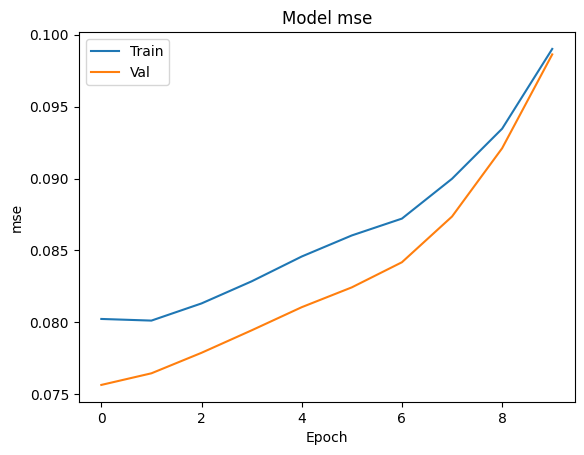

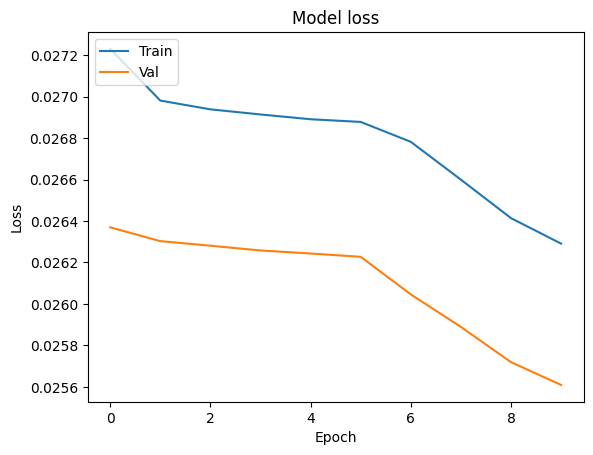

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

-------------------------------------------
VGG_LOSS
-------------------------------------------

In [19]:
from google.colab import drive
drive.mount('/content/drive')
MY_DRIVE = '/content/drive/MyDrive'
%cd MY_DRIVE

X_TRAIN_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/x_train/"
Y_TRAIN_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/y_train/"

# find the number of filenames that are in both, use this value as first
# dimension of training/test tensors, i.e. number of training instances
CMD_RESULT = !find $X_TRAIN_PATH $Y_TRAIN_PATH -printf '%P\n' | sort | uniq -d | wc -l
NUM_TRAINING_INSTANCES = int(CMD_RESULT[0])

print(X_TRAIN_PATH)
print(Y_TRAIN_PATH)
print(NUM_TRAINING_INSTANCES)
# assert NUM_TRAINING_INSTANCES > 500

####################
# 1. Dataset Loading
####################
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

def process(image):
    img = tf.cast(image, tf.float32) / 255.0
    return img

labels_dataset = tf.keras.preprocessing.image_dataset_from_directory(Y_TRAIN_PATH, label_mode=None, image_size=(512, 512), shuffle=False)
labels_dataset = labels_dataset.map(process)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(X_TRAIN_PATH, label_mode=None, image_size=(512, 512), shuffle=False)
train_dataset = train_dataset.map(process)

zipped_train_dataset = tf.data.Dataset.zip((train_dataset, labels_dataset))


############################
# 2. VGG-based Loss Function
############################
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

vgg_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv4').output, name="VGG19_Model")

def vgg_loss(y_true, y_pred):
    y_true_resized = tf.image.resize(y_true, (224, 224))
    y_pred_resized = tf.image.resize(y_pred, (224, 224))
    return tf.keras.losses.MSE(vgg_model(y_true_resized), vgg_model(y_pred_resized))



###########################
# 3. U-Net Model Definition
###########################
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

LEARNING_RATE = 0.0003

# Your model definition here (unchanged)
def generate_model():
  filters = [64, 128, 256, 512, 1024]

  poolsize = 2 # (2,2)
  kernelsize = 3 # (3,3)
  x = Input(shape=(512,512,3))
  a = Convolution2D(filters[0], kernelsize, activation="relu", padding="same")(x) ### save copy for later, use in upsampling (resnet/symmetric skip connection)
  b = MaxPooling2D(pool_size=poolsize, strides=2)(a)
  c = Convolution2D(filters[1], kernelsize, activation="relu", padding="same")(b)
  d = MaxPooling2D(pool_size=poolsize, strides=2)(c)
  e = Convolution2D(filters[2], kernelsize, activation="relu", padding="same")(d)
  f = MaxPooling2D(pool_size=poolsize, strides=2)(e)
  g = Convolution2D(filters[3], kernelsize, activation="relu", padding="same")(f)
  h = MaxPooling2D(pool_size=poolsize, strides=2)(g)
  i = Convolution2D(filters[4], kernelsize, activation="relu", padding="same")(h)
  j = UpSampling2D(size=poolsize, interpolation='nearest')(i)
  j1 = _shortcut(g, j) # combine the saved convolutional layer and upsampling
  k = Convolution2D(3, kernelsize, activation="relu", padding="same")(j1)
  l = UpSampling2D(size=poolsize, interpolation='nearest')(k)
  l1 = _shortcut(e, l)
  m = Convolution2D(3, kernelsize, activation="relu", padding="same")(l1)
  n = UpSampling2D(size=poolsize, interpolation='nearest')(m)
  l1 = _shortcut(c, n)
  o = Convolution2D(3, kernelsize, activation="relu", padding="same")(n)
  p = UpSampling2D(size=poolsize, interpolation='nearest')(o)
  p1 = _shortcut(a, p)
  q = Convolution2D(3, kernelsize, activation="relu", padding="same")(p1)
  r = Convolution2D(3, poolsize, activation="linear", padding="same")(q)
  model = Model(inputs=x, outputs=r, name="U_Net_Model")
  adam = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
  model.compile(optimizer=adam, loss=vgg_loss, metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

model = generate_model()


####################
# 4. Train the Model
####################
BATCH_SIZE = 16
EPOCHS = 10

history = model.fit(zipped_train_dataset, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'MY_DRIVE'
/content
/content/drive/MyDrive/Overview-Ind-Study/Overview/data/x_train/
/content/drive/MyDrive/Overview-Ind-Study/Overview/data/y_train/
2420
Found 2419 files belonging to 1 classes.
Found 2419 files belonging to 1 classes.


Epoch 1/10
76/76 [==============================] - 212s 2s/step - loss: 55.5043 - mean_squared_error: 0.0932
Epoch 2/10
76/76 [==============================] - 17s 228ms/step - loss: 51.9420 - mean_squared_error: 0.0776
Epoch 3/10
76/76 [==============================] - 17s 227ms/step - loss: 40.4662 - mean_squared_error: 0.0792
Epoch 4/10
76/76 [==============================] - 17s 227ms/step - loss: 34.3581 - mean_squared_error: 0.0847
Epoch 5/10
76/76 [==============================] - 18s 230ms/step - loss: 31.7245 - mean_squared_error: 0.0797
Epoch 6/10
76/76 [==============================] - 17s 228ms/step - loss: 30.1242 - mean_squared_error: 0.0787
Epoch 7/10
76/76 [==============================] - 17s 228ms/step - loss: 29.2008 - mean_squared_error: 0.0770
Epoch 8/10
76/76 [==============================] - 17s 228ms/step - loss: 27.0747 - mean_squared_error: 0.0721
Epoch 9/10
76/76 [==============================] - 17s 227ms/step - loss: 25.8588 - mean_squared_error: 0

In [20]:
# Create folder using timestamp, save model and output images there
now = datetime.now()

folder = f"{MY_DRIVE}/Overview-Ind-Study/Overview/models/{now}"

os.makedirs(folder, exist_ok=False)

model.save(f"{folder}/{model_name}.h5")

In [21]:
# extract test images
X_TEST_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/x_test/"
Y_TEST_PATH = f"{MY_DRIVE}/Overview-Ind-Study/Overview/data/y_test/"
def extract_data_testing(xPath, yPath):
  X, y = np.zeros((12,512,512,3)), np.zeros((12,512,512,3))

  index = 0
  for file in os.listdir(xPath):
    if path.exists(xPath + file):
        print('path exists: ')
        img = Image.open(xPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        X[index] = imgArray

        img = Image.open(yPath + file).convert('RGB')
        imgArray = np.asarray(img, dtype='uint8')
        imgArray =  imgArray / 255.0
        y[index] = imgArray

        index += 1
  return X, y
X_test, y_test = extract_data_testing(X_TEST_PATH, Y_TEST_PATH)

# evaluate model on test images
score = model.evaluate(X_test, y_test)

path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
path exists: 
1/1 [==============================] - 1s 1s/step - loss: 27.4034 - mean_squared_error: 0.0506


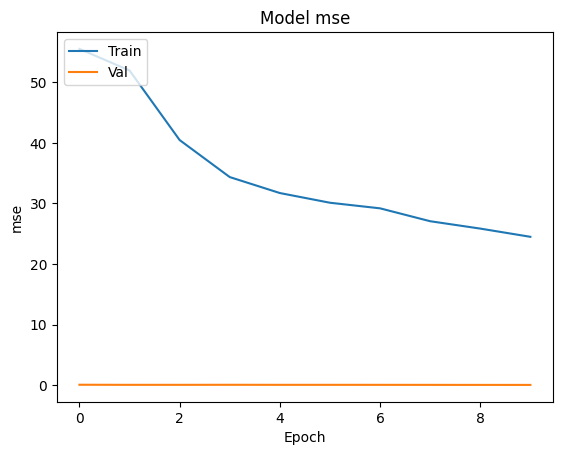

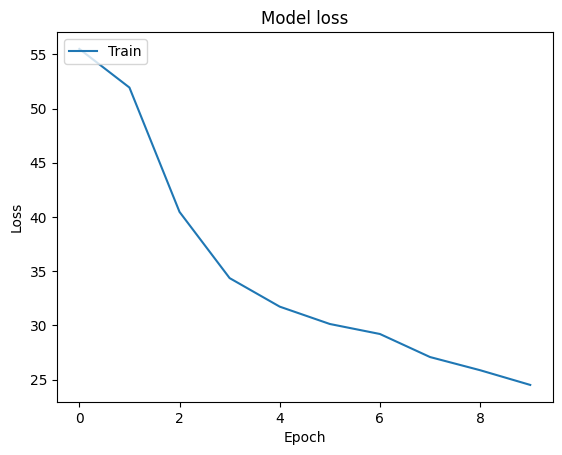

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [24]:
##################
# 5. Run Inference
##################
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from datetime import datetime
print("scoring...")
print (model.metrics_names, score)

def predict(image_path):
    img = load_img(image_path, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    # Convert prediction back to image
    predicted_img = tf.squeeze(prediction) * 255.0
    return predicted_img.numpy().astype(np.uint8)


# make prediction n
out_array = model.predict(X_test)
out_array = out_array.astype(np.float32) * 255.
out_array = np.clip(out_array, 0, 255).astype('uint8')


num, rows, cols, channels = out_array.shape
print(model_name)
for n in range(num):
    filename = str(n) + ".jpg"
    # save prediction
    out_img = Image.fromarray(out_array[n]).convert('L') # convert to black and white
    # ts = str(datetime.now())
    out_img.save(f"{folder}/{model_name}_{filename}", format="JPEG")
    out_img.show()

scoring...
['loss', 'mean_squared_error'] [27.4034423828125, 0.05058453977108002]
1/1 [==============================] - 0s 160ms/step
<function vgg_loss at 0x78717e2cc790>-16-100-0.0003-early-stop
